<a href="https://colab.research.google.com/github/zina1t/Spotify-Charts-Data-Analysis/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import calendar

In [83]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [84]:
df = df.dropna(subset=['key'])
df.dropna(inplace=True)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
track_name_to_id = {name: index for index, name in enumerate(df['track_name'].unique())}
df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)
df.info

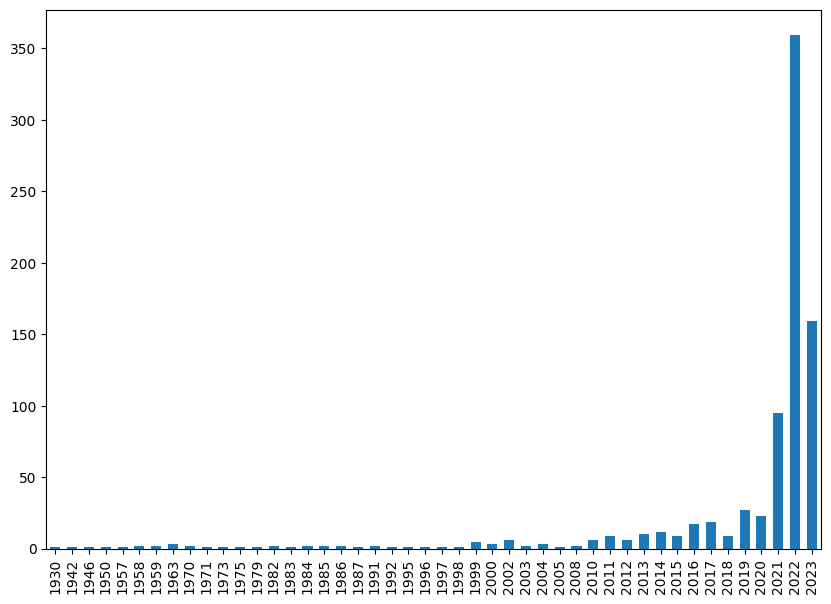

In [86]:
plt.figure(figsize = (10, 7))
years = df['released_year'].value_counts().sort_index()
years.plot(x = years.index, y = years, width=0.6, kind='bar')
plt.show()

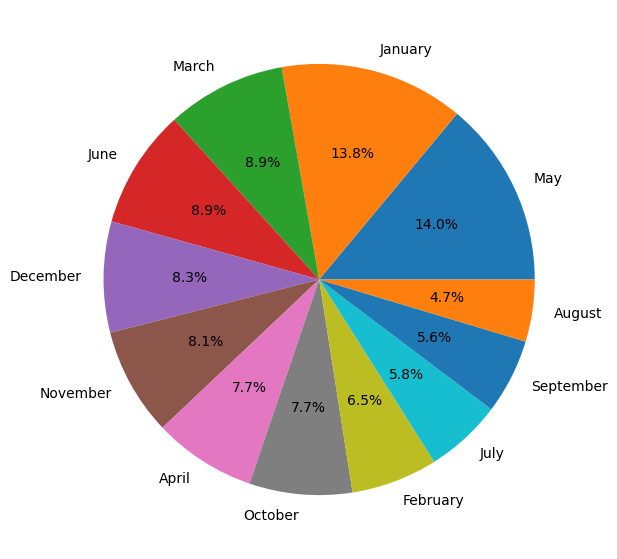

In [87]:
months = df['released_month'].value_counts()
m_names = [calendar.month_name[i] for i in months.index]

plt.figure(figsize = (10, 7))
plt.pie(months, labels=m_names, autopct='%.1f%%')
plt.show()

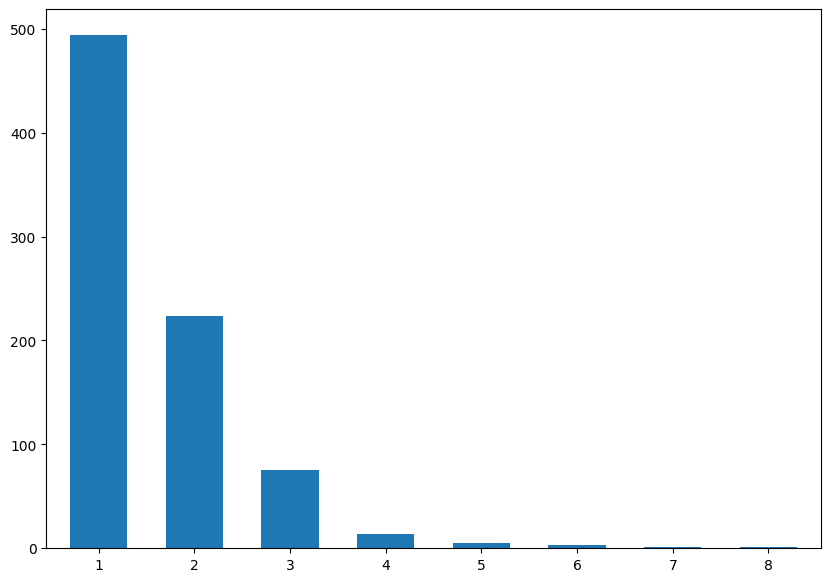

In [88]:
plt.figure(figsize = (10, 7))
artists = df['artist_count'].value_counts().sort_index()
artists.plot(x = artists.index, y = artists, width=0.6, kind='bar', rot=0)
plt.show()

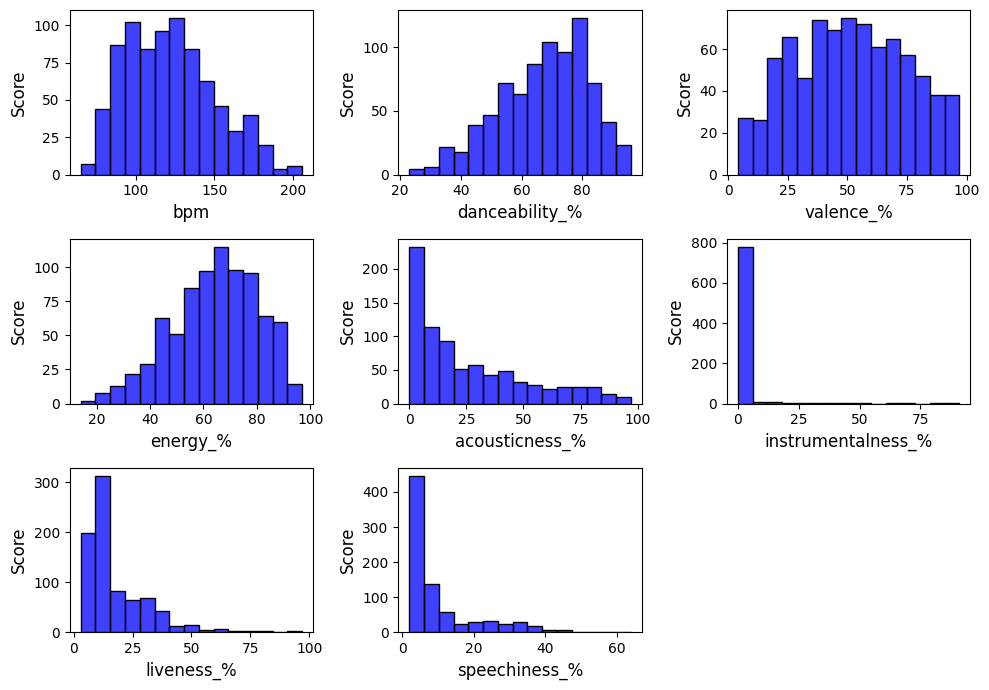

In [89]:
columns_analysis = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
plt.figure(figsize = (10, 7))
for i, column in enumerate(columns_analysis, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=15, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

In [90]:
correlation_matrix = df[columns_analysis].corr()
correlation_matrix

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
bpm,1.000000,-0.148174,0.029169,0.013363,-0.010767,-0.003407,-0.005817,0.038248
danceability_%,-0.148174,1.000000,0.389729,0.157970,-0.240454,-0.102144,-0.100579,0.201189
valence_%,0.029169,0.389729,1.000000,0.349736,-0.064072,-0.147032,0.000142,0.035704
energy_%,0.013363,0.157970,0.349736,1.000000,-0.552637,-0.051662,0.111240,-0.026880
acousticness_%,-0.010767,-0.240454,-0.064072,-0.552637,1.000000,0.046700,-0.046112,-0.017820
instrumentalness_%,-0.003407,-0.102144,-0.147032,-0.051662,0.046700,1.000000,-0.044626,-0.090994
liveness_%,-0.005817,-0.100579,0.000142,0.111240,-0.046112,-0.044626,1.000000,-0.022807
speechiness_%,0.038248,0.201189,0.035704,-0.026880,-0.017820,-0.090994,-0.022807,1.000000


<Axes: >

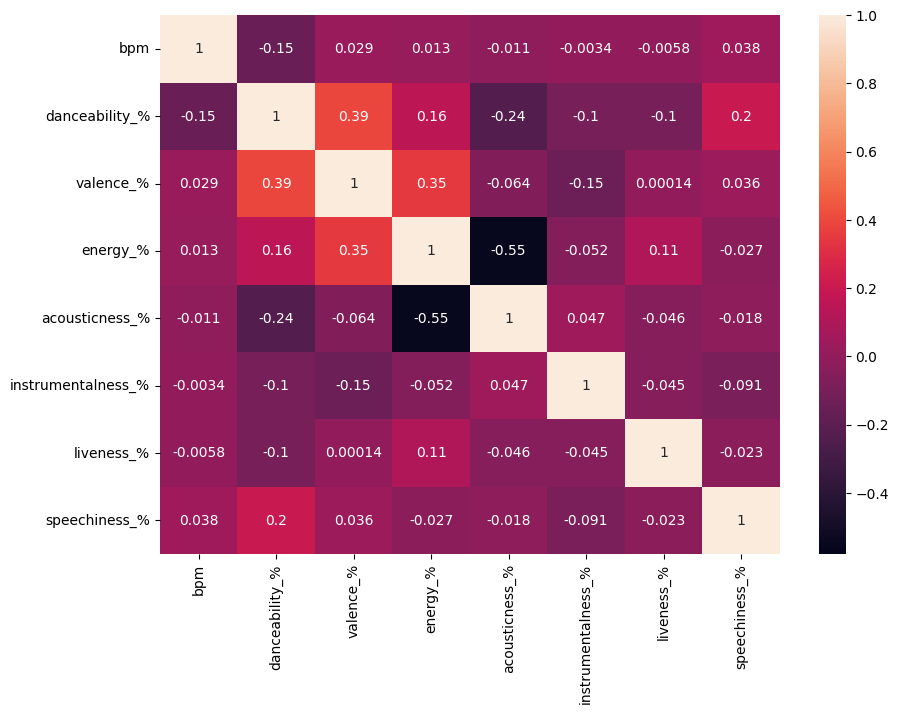

In [91]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, vmin=-0.58, vmax=1, annot=True)

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 7))

axes = axes.flatten()

scaler = MinMaxScaler()
df['streams'] = scaler.fit_transform(df[['streams']])

for i, column in enumerate(columns_analysis):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
sorted_keys = sorted(df['key'].unique())
average_streams = df.groupby('key')['streams'].mean().sort_values().index.tolist()
plt.figure(figsize=(10,7))
sns.boxplot(x='streams', y='key', data= df, order=average_streams)
plt.xlabel('Streams')
plt.ylabel('Keys')
plt.title('Box Plot of Streams by Keys')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
key_count = df['key'].value_counts(ascending=True)
colors  = sns.color_palette("Set2", len(key_count))

key_count.plot(x = 'key', y = key_count, kind='bar', color=colors)
plt.xlabel('Keys')
plt.ylabel('Count')
plt.title('Count of each key')
plt.xticks(rotation=0)
plt.show()

In [ ]:
key_df = df[['key', 'streams']].copy()
key_df = key_df.groupby('key')['streams'].agg(['mean', 'min', 'max'])
key_df = key_df.rename(columns={'mean' : 'avg_streams', 'min' : 'min_streams', 'max' : 'max_streams'})
key_df

In [ ]:
plt.figure(figsize=(10, 7))
key_df.plot(y ='avg_streams', color=colors, kind='bar', legend=False)
plt.xlabel('Keys')
plt.ylabel('Average streams')
plt.title('Average streams by key')
plt.xticks(rotation=0)
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 7))

axes = axes.flatten()

scaler = MinMaxScaler()
df['streams'] = scaler.fit_transform(df[['streams']])

for i, column in enumerate(columns_analysis):
    plt.sca(axes[i])
    plt.bar(df['key'], df[column])
    plt.ylabel('Key')
    plt.title(f'Key vs. {column}')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
columns_analysis = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['bpm'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('BPM')
  plt.ylabel(column)
  plt.title(f'BPM vs. {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

In [ ]:
columns_analysis = ['valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['danceability_%'], df[column], c=df[column], cmap=colormap, alpha=0.5)
  plt.xlabel('danceability_%')
  plt.ylabel(column)
  plt.title(f'danceability_% vs {column}')
  plt.colorbar(scatter, label=column)
[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

In [ ]:
columns_analysis = ['energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['valence_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('valence_%')
  plt.ylabel(column)
  plt.title(f'valence_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

In [ ]:
columns_analysis = ['acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['energy_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('energy_%')
  plt.ylabel(column)
  plt.title(f'energy_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

In [ ]:
columns_analysis = ['instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['acousticness_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('acousticness_%')
  plt.ylabel(column)
  plt.title(f'acousticness_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

In [ ]:
columns_analysis = ['liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['instrumentalness_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('instrumentalness_%')
  plt.ylabel(column)
  plt.title(f'instrumentalness_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))

colormap = plt.colormaps['viridis']

scatter = plt.scatter(df['liveness_%'], df['speechiness_%'], cmap=colormap, c=df[column], alpha=0.5)
plt.xlabel('instrumentalness_%')
plt.ylabel(column)
plt.title(f'instrumentalness_% vs {column}')
plt.colorbar(scatter, label=column)

plt.show()

In [105]:
df_features = df
df_features = pd.get_dummies(df, columns=['key', 'mode'], prefix=['key', 'mode'])
df_features.head()

binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']
df1 = df_features
for column in binary_columns:
    df1[column] = df_features[column].astype(int)

In [ ]:
df1.drop(columns=['artist_count', 'track_id','released_year','released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts'], inplace=True)
top_10_songs = df1.nlargest(10, 'streams')
top_10_songs.describe()

In [ ]:
top_50_songs = df1.nlargest(50, 'streams')
top_50_songs.describe()

In [ ]:
top_100_songs = df1.nlargest(100, 'streams')
top_100_songs.describe()

In [ ]:
top_250_songs = df1.nlargest(250, 'streams')
top_250_songs.describe()

In [ ]:
top_500_songs = df1.nlargest(500, 'streams')
top_500_songs.describe()

In [ ]:
top_817_songs = df1.nlargest(817, 'streams')
top_817_songs.describe()

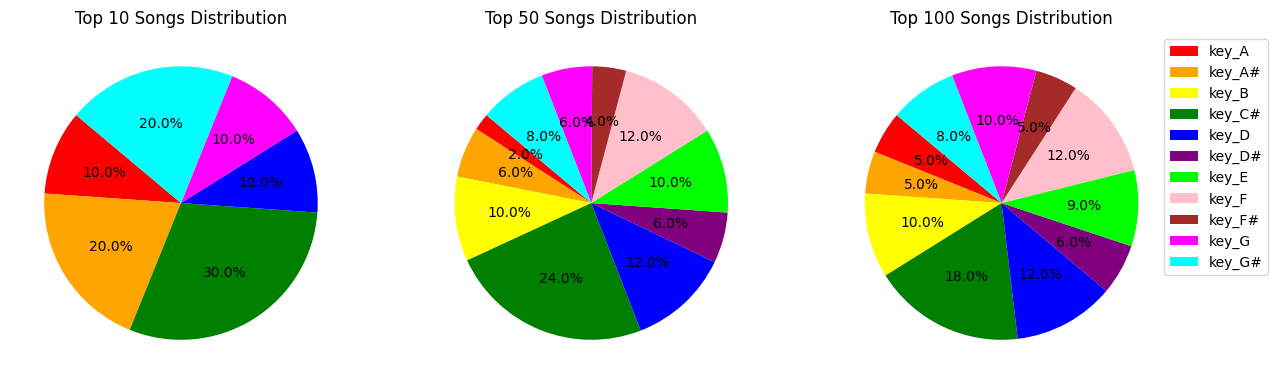

In [112]:
key_colors = {
    'key_A' : 'red',
    'key_A#' : 'orange',
    'key_B' : 'yellow',
    'key_C#' : 'green',
    'key_D' : 'blue',
    'key_D#' : 'purple',
    'key_E' : 'lime',
    'key_F' : 'pink',
    'key_F#' : 'brown',
    'key_G' : 'magenta',
    'key_G#' : 'cyan'
}

key_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#']

dataframes = [top_10_songs, top_50_songs, top_100_songs]

fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 5))

chart_titles = ['Top 10 Songs Distribution', 'Top 50 Songs Distribution', 'Top 100 Songs Distribution']
# create 3 pie charts for the top 10, top 50, top 100 popular tracks based on keys, without labels and with the legend
for i, df in enumerate(dataframes):
    plt.sca(axes[i])
    key_counts = df[key_columns].eq(1).sum()
    key_counts_filtered = key_counts[key_counts > 0]
    plt.pie(key_counts_filtered, labels=None, startangle=140, autopct='%.1f%%', colors=[key_colors[key] for key in key_counts_filtered.index])
    plt.title(chart_titles[i])
legend_labels = [key for key in key_counts_filtered.index]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

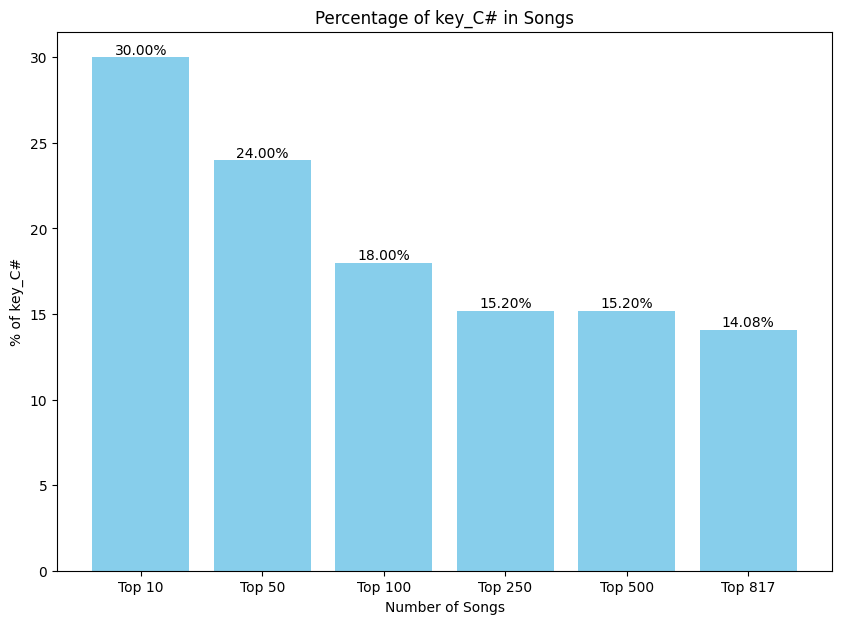

In [113]:
key_of_interest = 'key_C#'

top_dataframes = [top_10_songs, top_50_songs, top_100_songs, top_250_songs, top_500_songs, top_817_songs]
labels=['Top 10', 'Top 50', 'Top 100', 'Top 250', 'Top 500', 'Top 817']
key_percentage = []

for df in top_dataframes:
    key_counts = df[key_columns].eq(1).sum()
    key_percentage.append(key_counts[key_of_interest] / key_counts.sum() * 100)

plt.figure(figsize=(10, 7))
plt.bar(labels, key_percentage, color='skyblue')
plt.xlabel('Number of Songs')
plt.ylabel('% of key_C#')
plt.title('Percentage of key_C# in Songs')

for i, percentage in enumerate(key_percentage):
  plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')
plt.show()

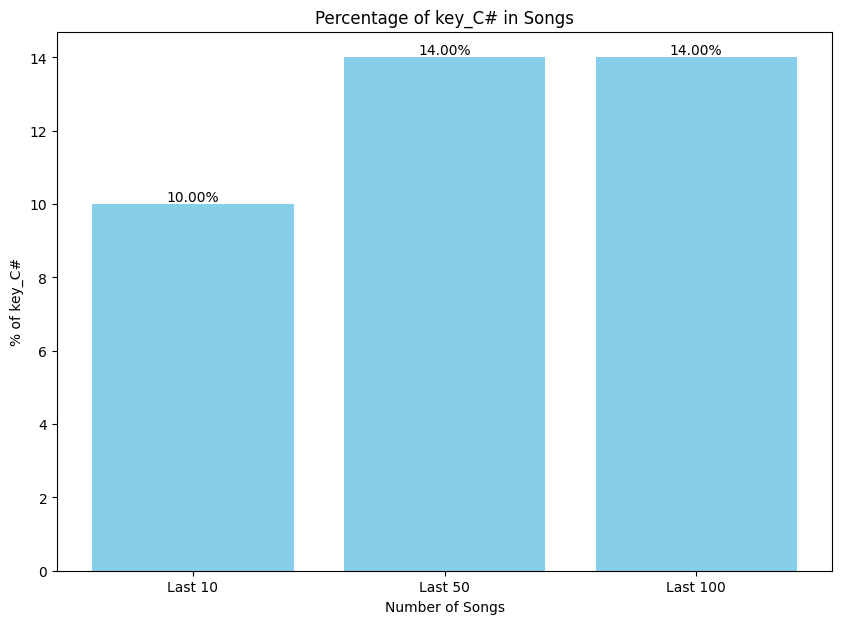

In [114]:
last_10_songs = df1.nsmallest(10, 'streams')
last_50_songs = df1.nsmallest(50, 'streams')
last_100_songs = df1.nsmallest(100, 'streams')

last_dataframes = [last_10_songs, last_50_songs, last_100_songs]
last_labels=['Last 10', 'Last 50', 'Last 100']
key_percentage = []

for df in last_dataframes:
    key_counts = df[key_columns].eq(1).sum()
    key_percentage.append(key_counts[key_of_interest] / key_counts.sum() * 100)

# Plot a bar chart for the percentage of key_C# in the last 10, last 100, last 250 popular tracks
plt.figure(figsize=(10, 7))
plt.bar(last_labels, key_percentage, color='skyblue')
plt.xlabel('Number of Songs')
plt.ylabel('% of key_C#')
plt.title('Percentage of key_C# in Songs')

# Add labels to the bar chart
for i, percentage in enumerate(key_percentage):
  plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')
plt.show()

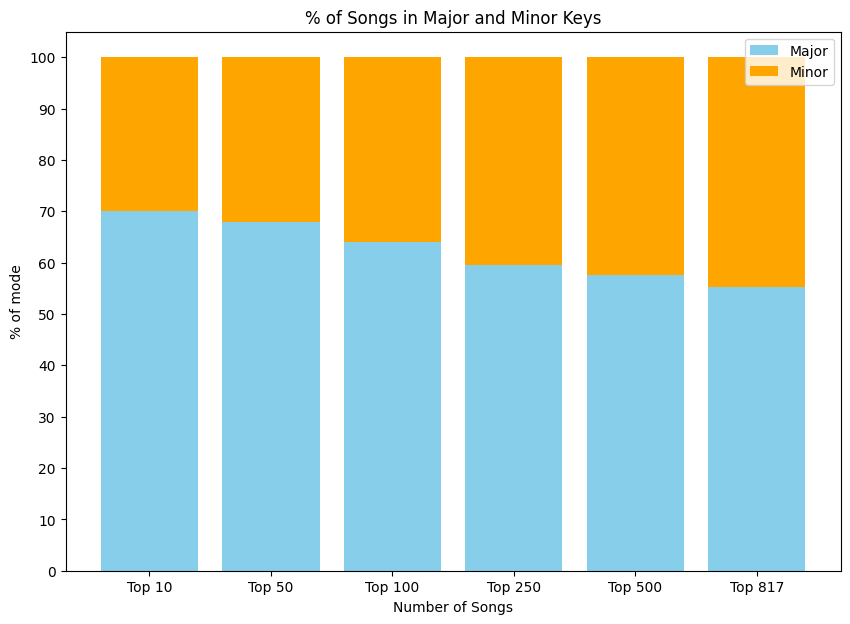

In [115]:
# Count major, minor percentage in top_dataframes
top_mode_major_percentage = [(df['mode_Major'].eq(1).sum() / len(df) * 100) for df in top_dataframes]
top_mode_minor_percentage = [(df['mode_Minor'].eq(1).sum() / len(df) * 100) for df in top_dataframes]

# Plot a stacked bar chart for the number of songs in major and minor keys in the top 10, top 50, top 100, top 250, top 500, top 817 popular tracks
plt.figure(figsize=(10, 7))
plt.bar(labels, top_mode_major_percentage, color='skyblue')
plt.bar(labels, top_mode_minor_percentage, bottom=top_mode_major_percentage, color='orange')
plt.xlabel('Number of Songs')
plt.ylabel('% of mode')
plt.title('% of Songs in Major and Minor Keys')
plt.legend(['Major', 'Minor'])
plt.yticks(np.arange(0, 110, 10))
plt.show()

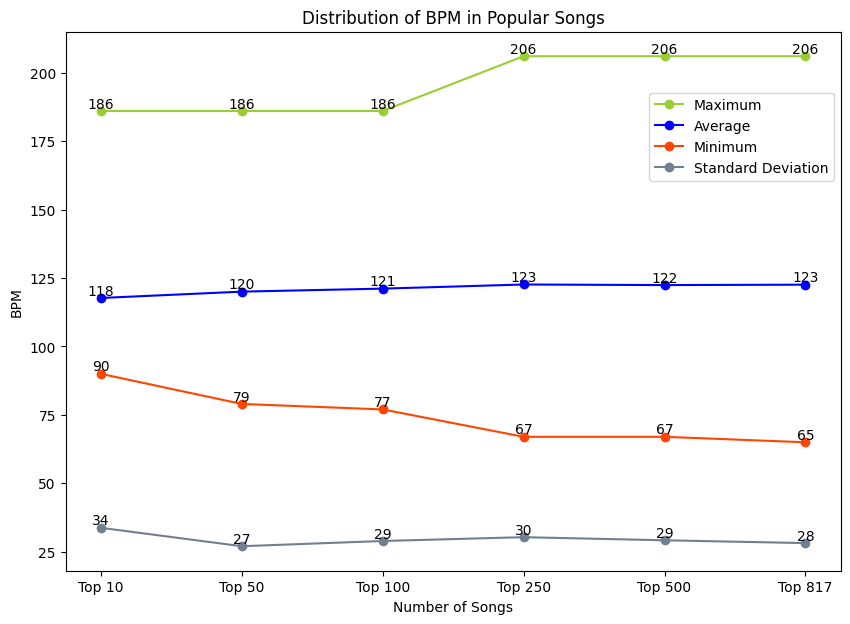

In [131]:
# Plot chart for the minimum, average, maximum, and standard deviation of BPM in the popular tracks
bpm_min = [df['bpm'].min() for df in top_dataframes]
bpm_avg = [df['bpm'].mean() for df in top_dataframes]
bpm_max = [df['bpm'].max() for df in top_dataframes]
bpm_std = [df['bpm'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, bpm_max, color='yellowgreen', marker='o')
plt.plot(labels, bpm_avg, color='blue', marker='o')
plt.plot(labels, bpm_min, color='orangered', marker='o',)
plt.plot(labels, bpm_std, color='slategray', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('BPM')
plt.title('Distribution of BPM in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(bpm_max, bpm_avg, bpm_min, bpm_std)):
  plt.text(i, max_val, f'{max_val:.0f}', ha='center', va='bottom')
  plt.text(i, avg_val, f'{avg_val:.0f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.0f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.0f}', ha='center', va='bottom')
plt.show()

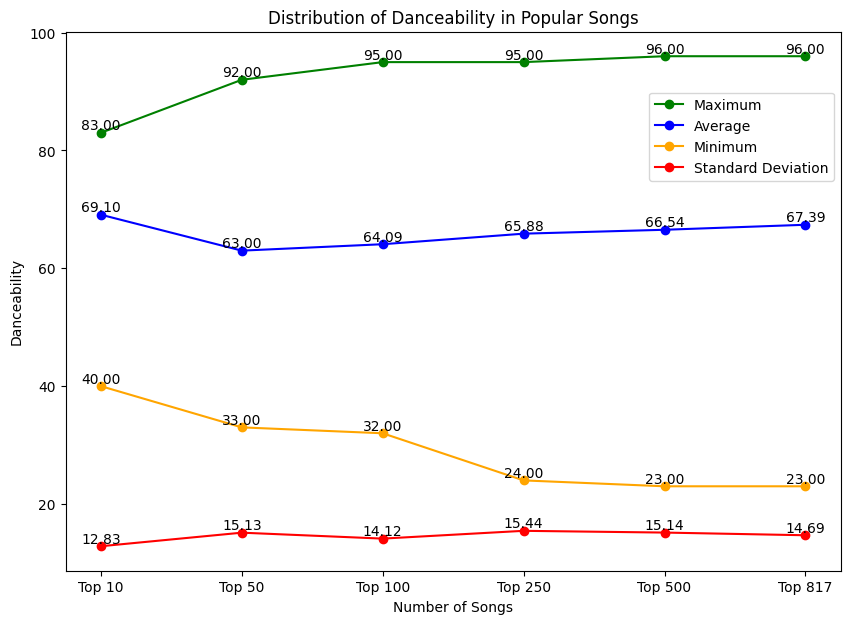

In [118]:
# Plot chart for the minimum, average, maximum, and standard deviation of danceability in the popular tracks
danceability_min = [df['danceability_%'].min() for df in top_dataframes]
danceability_avg = [df['danceability_%'].mean() for df in top_dataframes]
danceability_max = [df['danceability_%'].max() for df in top_dataframes]
danceability_std = [df['danceability_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, danceability_max, color='green', marker='o')
plt.plot(labels, danceability_avg, color='blue', marker='o')
plt.plot(labels, danceability_min, color='orange', marker='o',)
plt.plot(labels, danceability_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Danceability')
plt.title('Distribution of Danceability in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(danceability_max, danceability_avg, danceability_min, danceability_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, avg_val, f'{avg_val:.2f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='bottom')
plt.show()

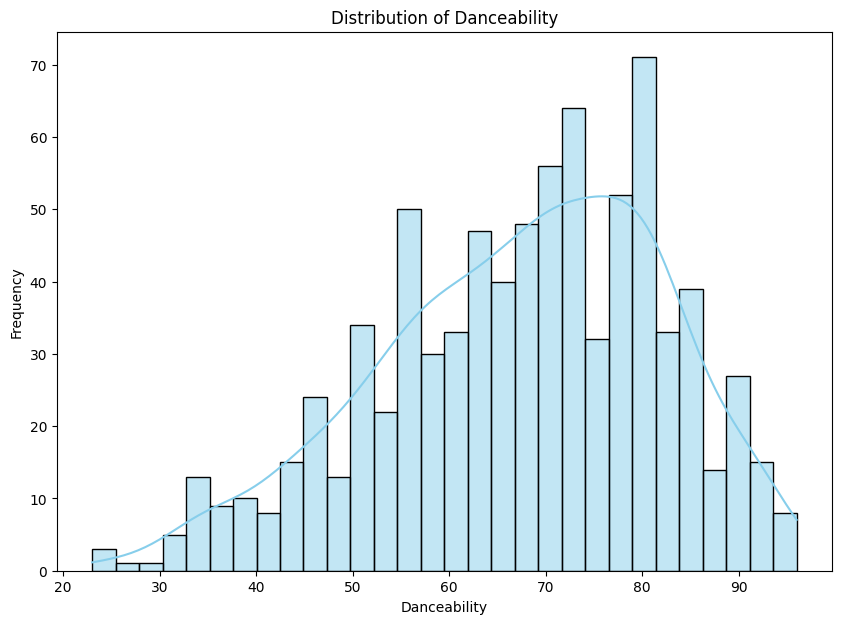

In [119]:
plt.figure(figsize=(10, 7))
sns.histplot(df1['danceability_%'], bins=30, kde=True, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

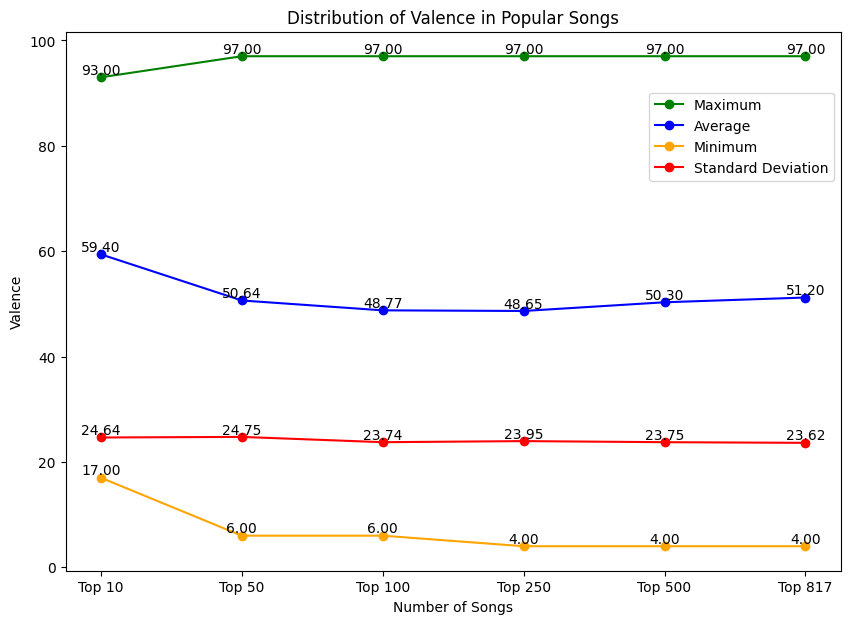

In [120]:
# Plot chart for the minimum, average, maximum, and standard deviation of valence in the popular tracks
valence_min = [df['valence_%'].min() for df in top_dataframes]
valence_avg = [df['valence_%'].mean() for df in top_dataframes]
valence_max = [df['valence_%'].max() for df in top_dataframes]
valence_std = [df['valence_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, valence_max, color='green', marker='o')
plt.plot(labels, valence_avg, color='blue', marker='o')
plt.plot(labels, valence_min, color='orange', marker='o',)
plt.plot(labels, valence_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Valence')
plt.title('Distribution of Valence in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(valence_max, valence_avg, valence_min, valence_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, avg_val, f'{avg_val:.2f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='bottom')
plt.show()

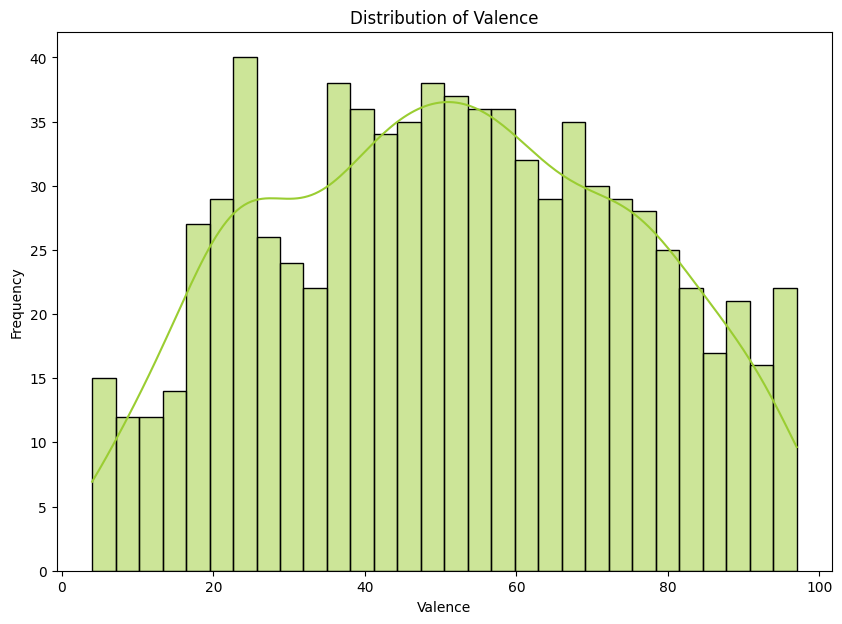

In [121]:
# Plot a histogram of the distribution of danceability in the popular tracks
plt.figure(figsize=(10, 7))
sns.histplot(df1['valence_%'], bins=30, kde=True, color='yellowgreen')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence')
plt.show()

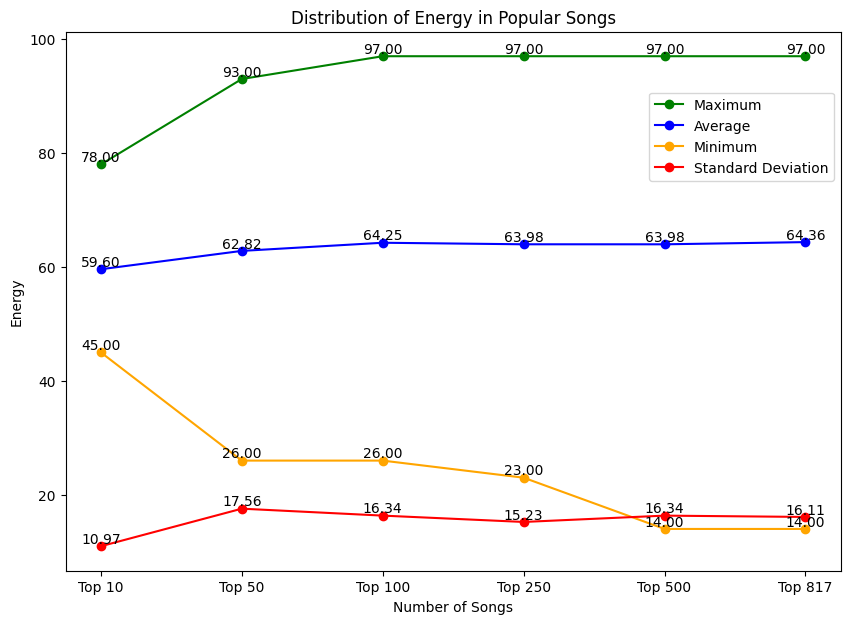

In [122]:
# Plot chart for the minimum, average, maximum, and standard deviation of energy in the popular tracks
energy_min = [df['energy_%'].min() for df in top_dataframes]
energy_avg = [df['energy_%'].mean() for df in top_dataframes]
energy_max = [df['energy_%'].max() for df in top_dataframes]
energy_std = [df['energy_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, energy_max, color='green', marker='o')
plt.plot(labels, energy_avg, color='blue', marker='o')
plt.plot(labels, energy_min, color='orange', marker='o',)
plt.plot(labels, energy_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Energy')
plt.title('Distribution of Energy in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(energy_max, energy_avg, energy_min, energy_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, avg_val, f'{avg_val:.2f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='bottom')
plt.show()

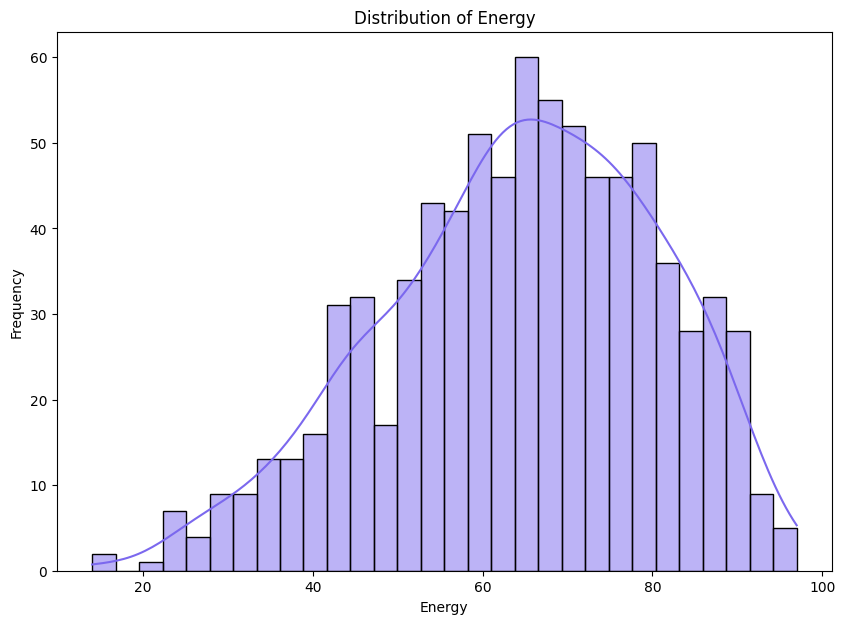

In [123]:
# Plot a histogram of the distribution of energy in the popular tracks
plt.figure(figsize=(10, 7))
sns.histplot(df1['energy_%'], bins=30, kde=True, color='mediumslateblue')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.show()

In [138]:
df['energy_%'].mean()

64.52

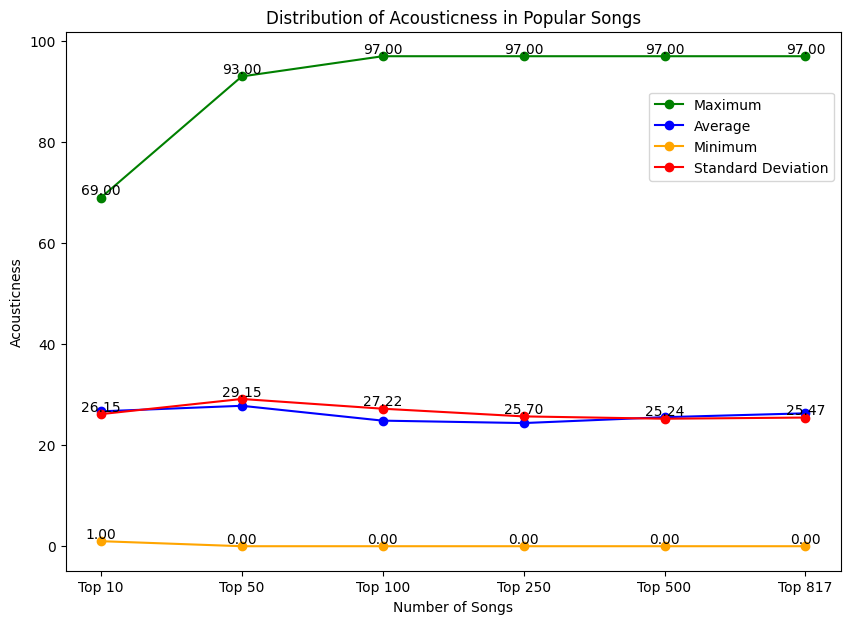

In [124]:
# Plot chart for the minimum, average, maximum, and standard deviation of acousticness in the popular tracks
acousticness_min = [df['acousticness_%'].min() for df in top_dataframes]
acousticness_avg = [df['acousticness_%'].mean() for df in top_dataframes]
acousticness_max = [df['acousticness_%'].max() for df in top_dataframes]
acousticness_std = [df['acousticness_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, acousticness_max, color='green', marker='o')
plt.plot(labels, acousticness_avg, color='blue', marker='o')
plt.plot(labels, acousticness_min, color='orange', marker='o',)
plt.plot(labels, acousticness_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Acousticness')
plt.title('Distribution of Acousticness in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(acousticness_max, acousticness_avg, acousticness_min, acousticness_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='bottom')
plt.show()

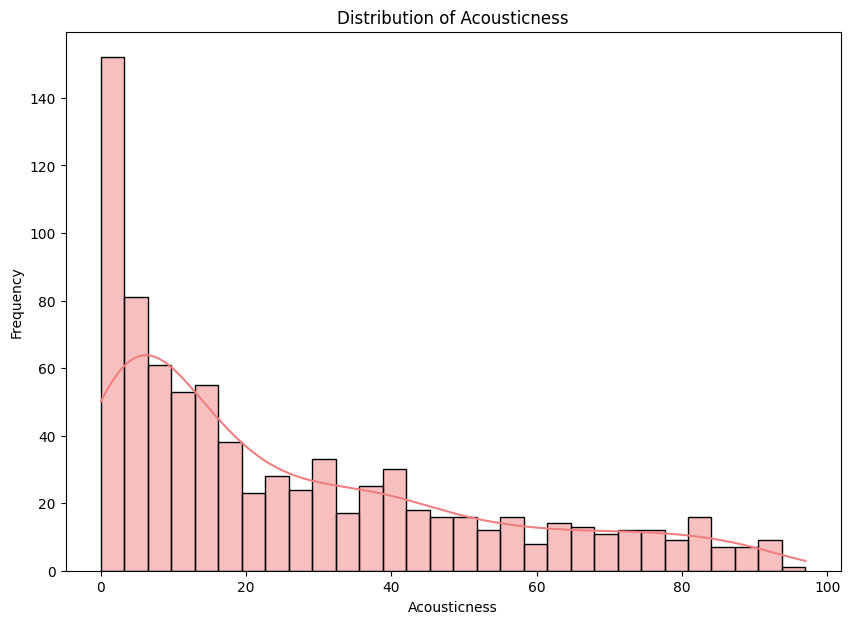

In [125]:
# Plot a histogram of the distribution of acousticness in the popular tracks
plt.figure(figsize=(10, 7))
sns.histplot(df1['acousticness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.show()

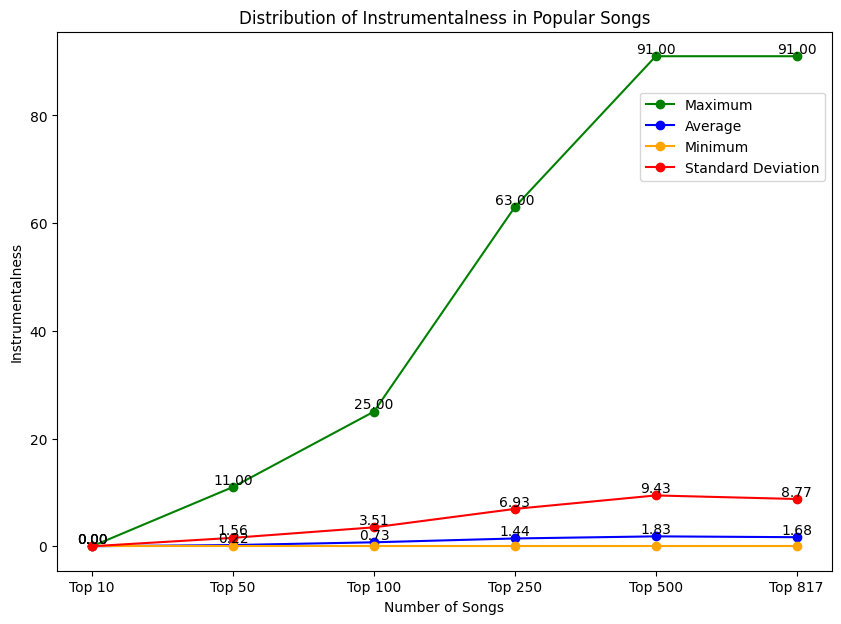

In [126]:
# Plot chart for the minimum, average, maximum, and standard deviation of instrumentalness in the popular tracks
instrumentalness_min = [df['instrumentalness_%'].min() for df in top_dataframes]
instrumentalness_avg = [df['instrumentalness_%'].mean() for df in top_dataframes]
instrumentalness_max = [df['instrumentalness_%'].max() for df in top_dataframes]
instrumentalness_std = [df['instrumentalness_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, instrumentalness_max, color='green', marker='o')
plt.plot(labels, instrumentalness_avg, color='blue', marker='o')
plt.plot(labels, instrumentalness_min, color='orange', marker='o',)
plt.plot(labels, instrumentalness_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Instrumentalness')
plt.title('Distribution of Instrumentalness in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(instrumentalness_max, instrumentalness_avg, instrumentalness_min, instrumentalness_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, avg_val, f'{avg_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='bottom')
plt.show()

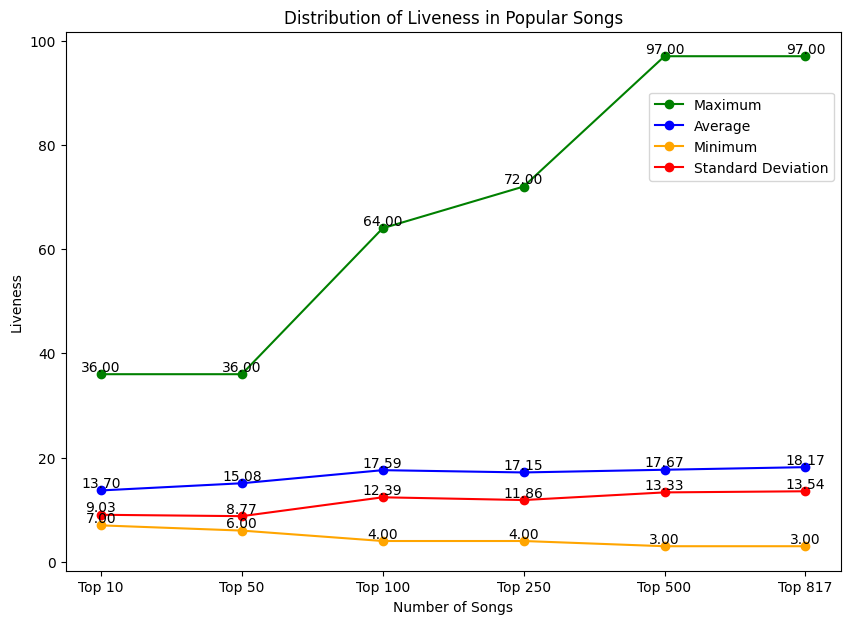

In [127]:
# Plot chart for the minimum, average, maximum, and standard deviation of liveness in the popular tracks
liveness_min = [df['liveness_%'].min() for df in top_dataframes]
liveness_avg = [df['liveness_%'].mean() for df in top_dataframes]
liveness_max = [df['liveness_%'].max() for df in top_dataframes]
liveness_std = [df['liveness_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, liveness_max, color='green', marker='o')
plt.plot(labels, liveness_avg, color='blue', marker='o')
plt.plot(labels, liveness_min, color='orange', marker='o',)
plt.plot(labels, liveness_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Liveness')
plt.title('Distribution of Liveness in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper right', bbox_to_anchor=(1.0, 0.9))

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(liveness_max, liveness_avg, liveness_min, liveness_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, avg_val, f'{avg_val:.2f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='bottom')
plt.show()

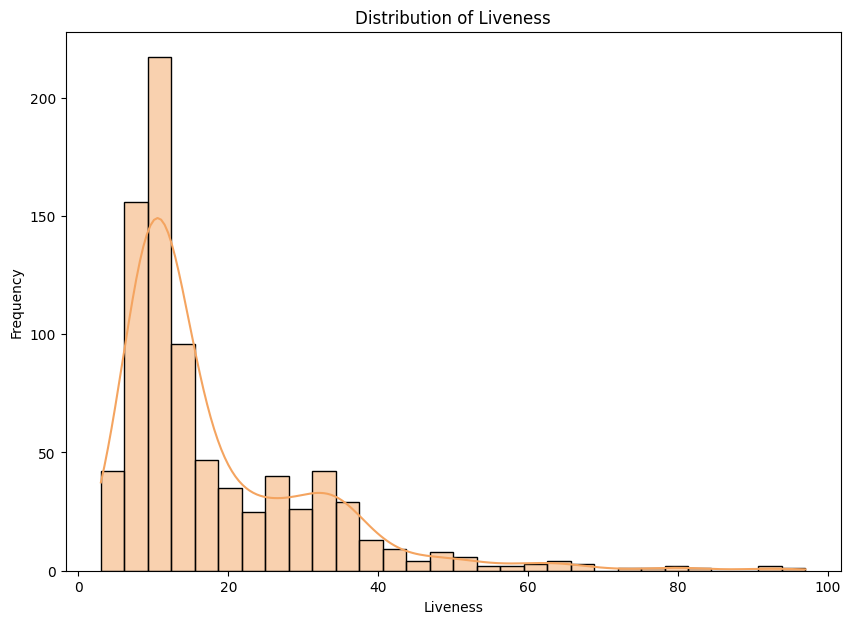

In [128]:
# Plot a histogram of the distribution of liveness in the popular tracks
plt.figure(figsize=(10, 7))
sns.histplot(df1['liveness_%'], bins=30, kde=True, color='sandybrown')
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.title('Distribution of Liveness')
plt.show()

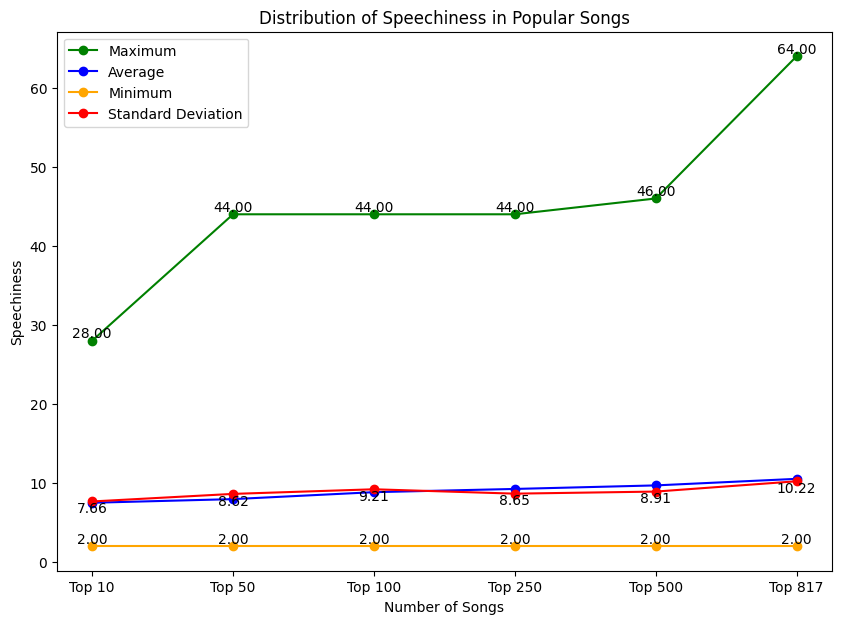

In [129]:
# Plot chart for the minimum, average, maximum, and standard deviation of speechiness in the popular tracks
speechiness_min = [df['speechiness_%'].min() for df in top_dataframes]
speechiness_avg = [df['speechiness_%'].mean() for df in top_dataframes]
speechiness_max = [df['speechiness_%'].max() for df in top_dataframes]
speechiness_std = [df['speechiness_%'].std() for df in top_dataframes]

plt.figure(figsize=(10, 7))
plt.plot(labels, speechiness_max, color='green', marker='o')
plt.plot(labels, speechiness_avg, color='blue', marker='o')
plt.plot(labels, speechiness_min, color='orange', marker='o',)
plt.plot(labels, speechiness_std, color='red', marker='o')
plt.xlabel('Number of Songs')
plt.ylabel('Speechiness')
plt.title('Distribution of Speechiness in Popular Songs')
plt.legend(['Maximum', 'Average', 'Minimum', 'Standard Deviation'], loc='upper left')

#add text labels to the lines
for i, (max_val, avg_val, min_val, std_val) in enumerate(zip(speechiness_max, speechiness_avg, speechiness_min, speechiness_std)):
  plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='bottom')
  plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom')
  plt.text(i, std_val, f'{std_val:.2f}', ha='center', va='top')
plt.show()

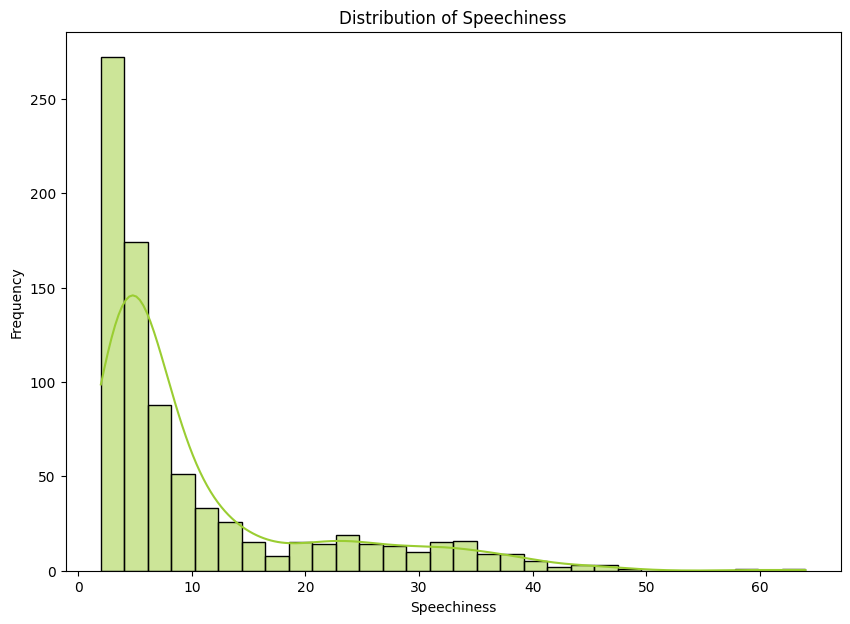

In [130]:
# Plot a histogram of the distribution of speechiness in the popular tracks
plt.figure(figsize=(10, 7))
sns.histplot(df1['speechiness_%'], bins=30, kde=True, color='yellowgreen')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.title('Distribution of Speechiness')
plt.show()

# Summary
1. Key, mode, BPM, energy are the most important parameters.
2.   Most songs are from 2022 (2 times more than from 2023)

3.   30% of songs were released in the spring

4.   key_C# is the best choice
*   Top 10 vs last 10:
30% vs 10%
*   Top 50 vs last 50:
24% vs 14%
*   Top 100 vs last 100:
18% vs 14%
5.   Mode Major is more popular than Minor:
*   Top 10: 70% of mode Major
*   Top 100: 64% of mode Major
*   Top 50: 68% of mode Major

6. BPM:
* Overall average is 120
* Best range is between 90 and 120
* Top 10 average: 118, but with large standard deviation (34)

7. Energy:
* Overall average is 65
* Best range is between 50 and 80
